In [61]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics


In [2]:
df = pd.read_csv("car_evaluation.csv")

df.head()

,buying_price,maintainance_cost,no_of_doors,seating_capacity,lug_boot,safety,car_status
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.isnull().sum()


buying_price         0
maintainance_cost    0
no_of_doors          0
seating_capacity     0
lug_boot             0
safety               0
car_status           0
dtype: int64

<Axes: >

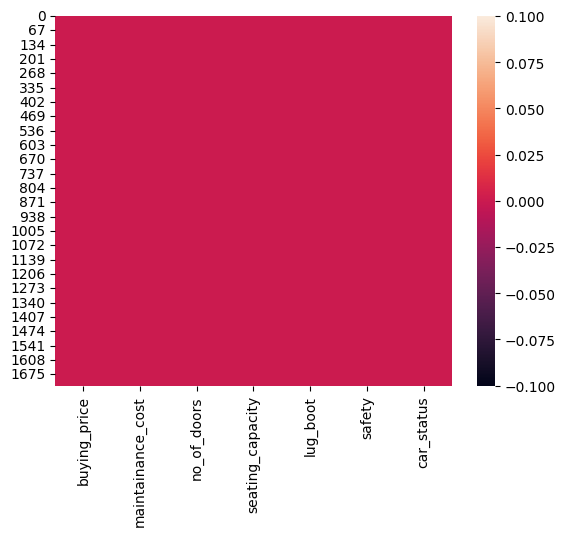

In [4]:
sns.heatmap(df.isna())

In [5]:
numeric = ['no_of_doors', 'seating_capacity']
categoric = ['buying_price', 'maintainance_cost', 'lug_boot', 'safety', 'car_status']

In [6]:
le = LabelEncoder()

In [7]:
for column in categoric:
    df[column] = le.fit_transform(df[column])
    
le

LabelEncoder()

In [8]:
X = df.drop(columns=['car_status'])

y = df['car_status']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
X_train

,buying_price,maintainance_cost,no_of_doors,seating_capacity,lug_boot,safety
107,3,3,5,5,0,0
901,2,3,3,4,2,2
1709,1,1,5,2,0,0
706,0,2,4,2,1,2
678,0,2,3,2,1,1
...,...,...,...,...,...,...
1130,2,2,3,5,1,0
1294,2,1,5,5,0,2
860,0,1,5,5,1,0
1459,1,0,4,2,2,2


In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)


In [11]:
x_train



array([[ 1.35185249,  1.34948141,  1.34190571,  1.06547044, -1.22474807,
        -1.23299669],
       [ 0.4506175 ,  1.34948141, -0.44385615,  0.25774683,  1.22120833,
         1.22765519],
       [-0.4506175 , -0.43433811,  1.34190571, -1.3577004 , -1.22474807,
        -1.23299669],
       ...,
       [-1.35185249, -0.43433811,  1.34190571,  1.06547044, -0.00176987,
        -1.23299669],
       [-0.4506175 , -1.32624787,  0.44902478, -1.3577004 ,  1.22120833,
         1.22765519],
       [ 0.4506175 ,  0.45757165, -0.44385615,  1.06547044,  1.22120833,
         1.22765519]])

In [12]:
x_test

array([[-1.35185249, -1.32624787,  0.44902478, -1.3577004 , -0.00176987,
        -1.23299669],
       [ 0.4506175 , -0.43433811, -1.33673708,  0.25774683, -0.00176987,
         1.22765519],
       [-1.35185249, -1.32624787,  1.34190571, -1.3577004 , -1.22474807,
         1.22765519],
       ...,
       [ 0.4506175 , -0.43433811, -1.33673708,  1.06547044,  1.22120833,
        -0.00267075],
       [ 1.35185249,  1.34948141,  1.34190571,  1.06547044,  1.22120833,
        -1.23299669],
       [ 0.4506175 ,  0.45757165, -1.33673708, -1.3577004 , -0.00176987,
         1.22765519]])

array([[<Axes: title={'center': 'buying_price'}>,
        <Axes: title={'center': 'maintainance_cost'}>],
       [<Axes: title={'center': 'no_of_doors'}>,
        <Axes: title={'center': 'seating_capacity'}>],
       [<Axes: title={'center': 'lug_boot'}>,
        <Axes: title={'center': 'safety'}>]], dtype=object)

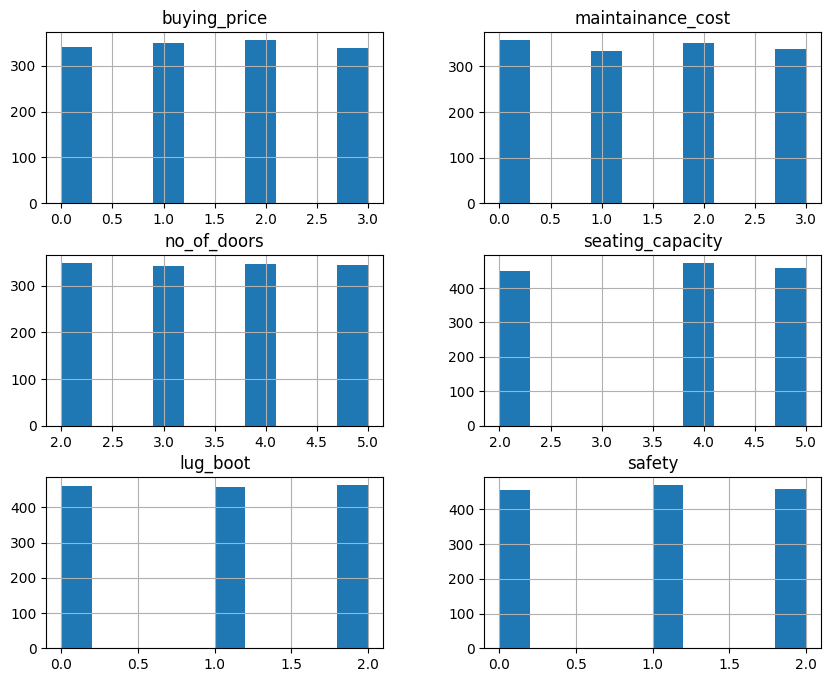

In [13]:
# Plotting histograms for column

X_train.hist(figsize=(10, 8))


In [14]:
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
RF_predictions = RF_model.predict(X_test)
RF_accuracy = accuracy_score(y_test, RF_predictions)


In [22]:
RF_accuracy

0.9739884393063584

In [23]:
RF_report = classification_report(y_test, RF_predictions)

RF_report

'              precision    recall  f1-score   support\n\n           0       0.99      0.90      0.94        83\n           1       0.65      1.00      0.79        11\n           2       0.99      1.00      1.00       235\n           3       1.00      0.94      0.97        17\n\n    accuracy                           0.97       346\n   macro avg       0.91      0.96      0.92       346\nweighted avg       0.98      0.97      0.98       346\n'

In [54]:
RF_confusion = confusion_matrix(y_test, RF_predictions)

RF_confusion

array([[ 75,   6,   2,   0],
       [  0,  11,   0,   0],
       [  0,   0, 235,   0],
       [  1,   0,   0,  16]])

In [24]:
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [28]:
DT_predictions = DT_model.predict(X_test)
DT_accuracy = accuracy_score(y_test, DT_predictions)

In [29]:
DT_accuracy

0.9739884393063584

In [30]:
DT_report = classification_report(y_test, DT_predictions)

DT_report

'              precision    recall  f1-score   support\n\n           0       0.97      0.92      0.94        83\n           1       0.62      0.91      0.74        11\n           2       1.00      1.00      1.00       235\n           3       1.00      0.94      0.97        17\n\n    accuracy                           0.97       346\n   macro avg       0.90      0.94      0.91       346\nweighted avg       0.98      0.97      0.98       346\n'

In [114]:
DT_confusion = confusion_matrix(y_test, DT_predictions)

DT_confusion

array([[ 76,   6,   1,   0],
       [  1,  10,   0,   0],
       [  0,   0, 235,   0],
       [  1,   0,   0,  16]])

In [33]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
KNN_predictions = KNN_model.predict(X_test)
KNN_accuracy = accuracy_score(y_test, KNN_predictions)

In [35]:
KNN_accuracy

0.9104046242774566

In [37]:
KNN_report = classification_report(y_test, KNN_predictions)

KNN_report

'              precision    recall  f1-score   support\n\n           0       0.82      0.82      0.82        83\n           1       0.44      0.36      0.40        11\n           2       0.96      1.00      0.98       235\n           3       0.90      0.53      0.67        17\n\n    accuracy                           0.91       346\n   macro avg       0.78      0.68      0.72       346\nweighted avg       0.91      0.91      0.91       346\n'

In [57]:
KNN_confusion = confusion_matrix(y_test, KNN_predictions)

KNN_confusion

array([[ 68,   4,  10,   1],
       [  7,   4,   0,   0],
       [  1,   0, 234,   0],
       [  7,   1,   0,   9]])

In [38]:
accuracies = {
    'Random Forest': RF_accuracy,
    'Decision Tree': DT_accuracy,
    'KNN': KNN_accuracy
}

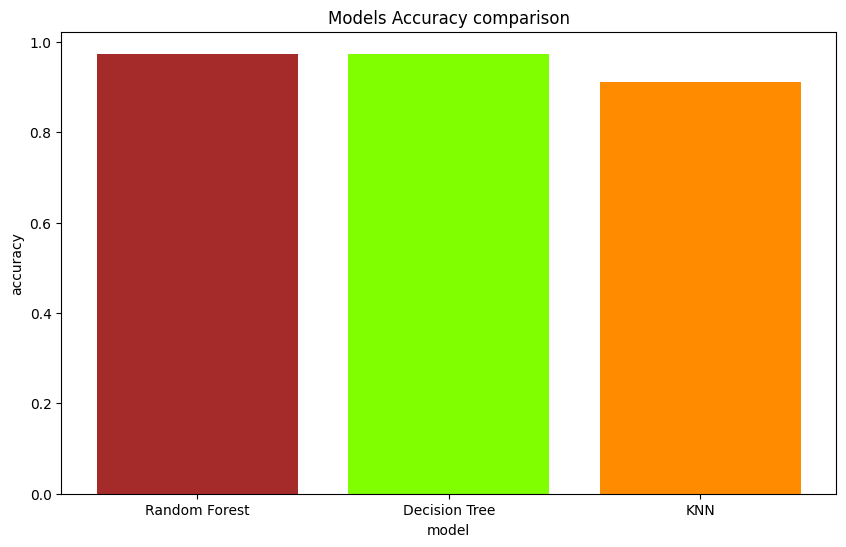

In [82]:
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['#A52A2A', '#7FFF00', '#FF8C00'])  # Plot the bars
plt.title('Models Accuracy comparison')
plt.xlabel('model')
plt.ylabel('accuracy')
plt.show()


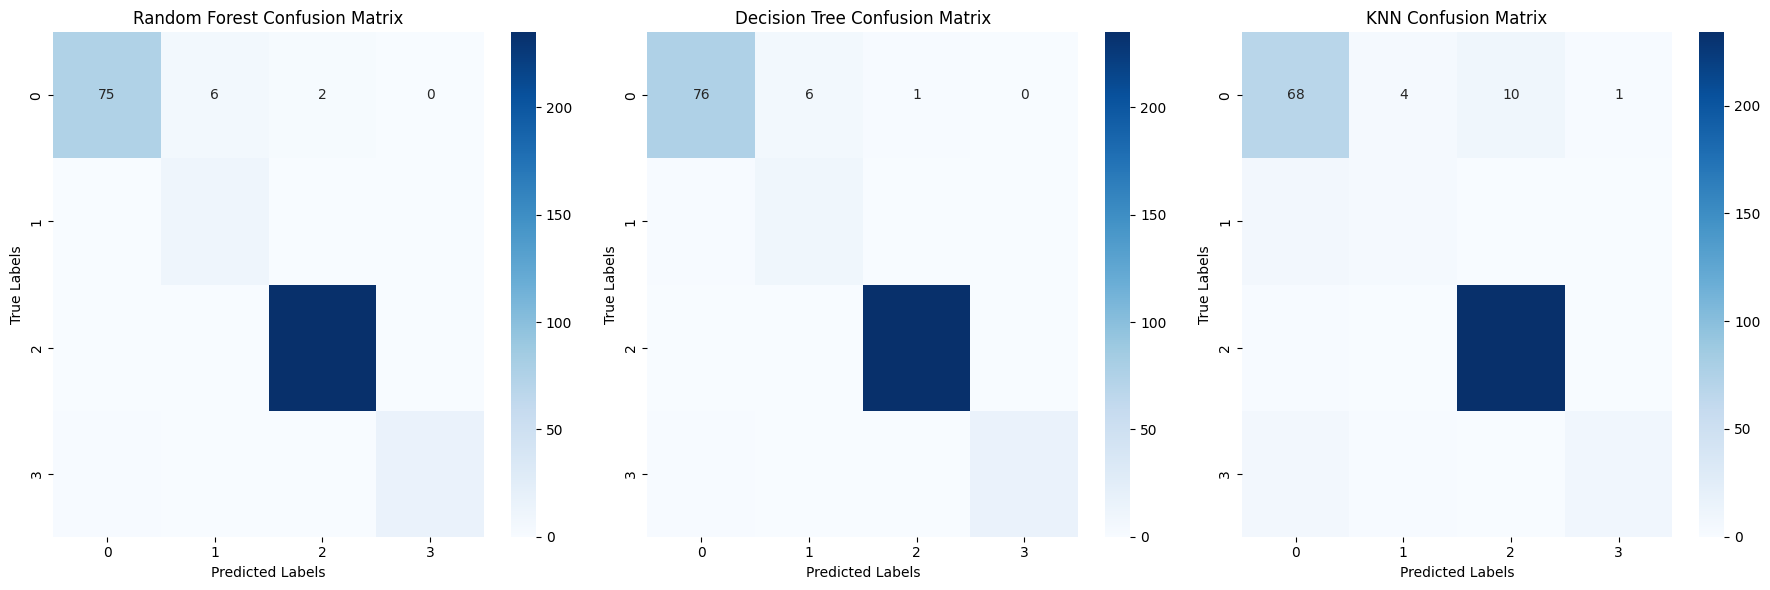

In [112]:
# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of confusion matrices and titles
cm_list = [RF_cm, DT_confusion, KNN_confusion]
titles = ['Random Forest', 'Decision Tree', 'KNN']

# Loop through the models and plot confusion matrices
for i, cm in enumerate(cm_list):
    sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{titles[i]} Confusion atrix')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

plt.tight_layout()
plt.show()